In [60]:
from IPython.display import Image
import os

# Implementing the Viterbi Decoder: A Hidden Markov Model Approach for Predicing Part-of-Speech Tags Compared to a Simple Baseline Approach. 

## Overview

The purpose of this assignment was to use the probabilistic approach of a Hidden Markov Model (HMM) to predict the most probable tag sequence from a bigram tagger, by leveraging dynamic programming and implementing a Viterbi decoder. As presented in Chapter 9 of the textbook, the following equation was used to create the transition matrix and the observation likelihood matrix required for this work: 


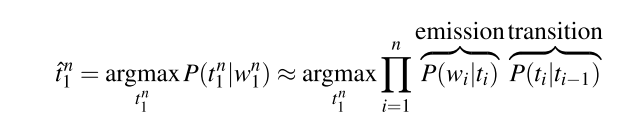

In [72]:
Image(os.path.expanduser("~/Dropbox/Screenshots/Screenshot2.png"))

Decisions around smoothing for both the emission and transition probabilities, as well as the treatment of unknown words for the emission probabilties, are presented below. 

Table 1 presents the results of the training and test set of the final model (where the entire BeRP training corpus was randomly divided: 80% to DevTrain and 20% alloted to DevTest). One poignant takeaway from these results is that the baseline model performed almost as well as the HMM for both the train and test tests -- and perhaps might even perform better on a set of sentences that are very different from those found in the BeRP traning corpus. 

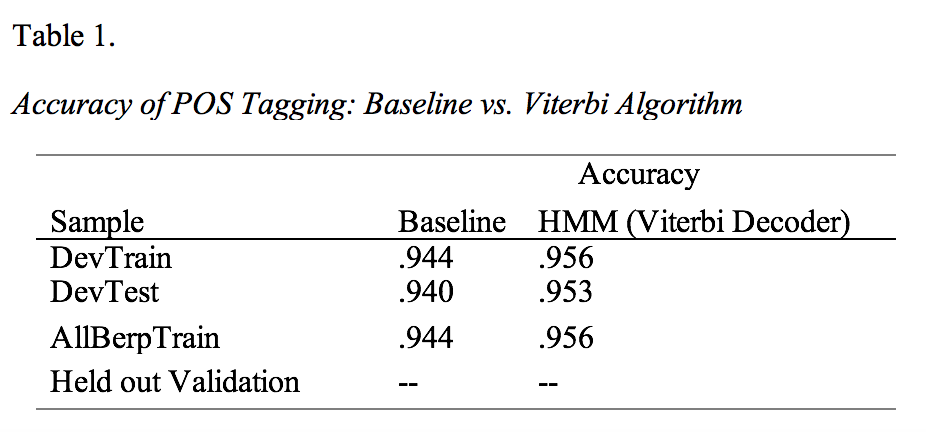

In [107]:
Image(os.path.expanduser("~/Dropbox/Screenshots/Screenshot5.png"))

Regarding how well I think that the heldout test set will perform: It will depend on the composition of the test set. That is, if the words from the training set and the test set are randomly sampled from BeRP, then I expect very similar results to what we are seeing from the DevTest results (that is, accuracy around 95%). However, if the words come from another corpus (or are note randomly sampled from the BeRP corpus), then I don't expect my approach to work as well -- as it was trained on a very select and repetitive group of words, and my model may not generalize well to other corpora. 

## Methodology
#### Baseline Model
The baseline model was simply assigning the most common POS to each word. In instances where the word was unknown, it used the most popular tag in the training data.

#### DevTrain and DevTest set
Accuracy was evaluated by randomly dividing the berp-POS-training.txt file into an intermediate training and validation sample (80% training and 20% testing). At first, I made the incorrect assumption that the tranining corpus could be considered already randomly sorted -- however, after manually taking the bottom 10% of the file as my DevTest, I quickly found that the composition of the words in the later portion of the training set were different from the other parts of the file -- that is, when I ran my DevTest through the system, I noted a severe degradgation in performance. (This observation contributes to my previous comment that suggests that my probabilistic model will work quite well on a held-out test sample that has been randomly sampled from the same corpus as the training sample, but a large amount of degradation will be expected if the sentences come from some other source.)  

Upon completion of the final model, I recreated the transition and observation matrices, using the entire training sample (berp-POS-training.txt)

#### Viterbi Algorithm 

After evaluating the accuracy of the baseline model, I then implemented the Viterbi algorithm with a bigram-based approach. In order to ensure that this algorithm was implemented correctly, I applied a few different checks to it: First I implemented the ice cream example from Chapter 9 (Hidden Markov Models). After computing by hand the most probable sequence of days for the events of of {1, 3, 1}, I verified this with my implementation of the Viterbi algorithm. Another check was to use the transition probabilities and the observation liklihood presented in Figures 10.5 and 10.6 in Chapter 10 (Part-of-Speech) tagging to ensure that I was getting the same predicted sequence of labels for the event ['janet', 'will', 'back', 'the', 'bill']. 

When I felt comfortable with how the Viterbi algorithm was working, I then moved on to the smoothing decisions for both the transition probabilties and the observation likelihoods. 

#### Smoothing 
Smoothing was applied to both the matrices for the transition and observation probabilities. The simplest approach to smoothing was used for this project -- that is, Laplace smoothing. Initially I used the default add-one smoothing, but I then ran a few different values of k, and found that adding .01 worked the best (applying this to both the transition and observation matrices). Table 2 presents the slight improvement in the DevTrain and DevTest samples when k = .01: 

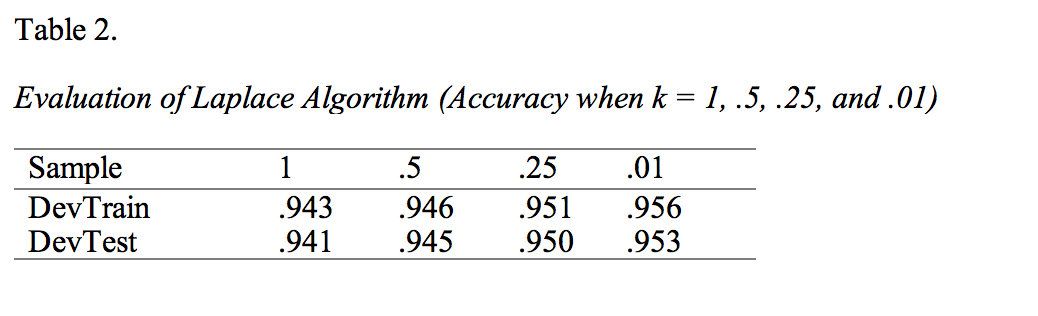

In [80]:
Image(os.path.expanduser("~/Dropbox/Screenshots/Screenshot3.png"))

#### Handling Unknown Words
The observation likelihood matrix needs to be a fixed set of vocabulary -- which consists of all of the unique words in the training set, as well as the introduction of a new word: 'UNK.' For my implementation, I considered any word that appeared only once as an unknown word. Therefore, in a test set, any unkown word will have be converted as such (that is, the word literally turns to 'UNK' in the test set). 

I did explore setting different thresholds in the training data for what should be considered 'UNK' (i.e., when the word appeared less than 3 times and less than 5 times), but all I observed was a slight degrdation in performance. 

## Running the Code

My script is exceutable with the following unix command:

In [121]:
burkhardt-amy-assng2.py training.txt prediction.txt > output.txt

Where the first argument is the name of my Python scrcipt, the second is the file that is used to create the probability matrices, the third is file for which I want to predict POS tags. These predictions are then printed out to the final 

### Train and predict on DevTrain

In [126]:
! python burkhardt-amy-assgn2.py Data/rand_training.txt Data/rand_training.txt > Data/burkhardt-amy-assgn2-devtrain-output.txt

### Train on DevTrain and predict on DevTest

In [127]:
! python burkhardt-amy-assgn2.py Data/rand_training.txt Data/rand_test.txt > Data/burkhardt-amy-assgn2-devtest-output.txt

### Train on entire berp-POS-training.txt sample and predict on assgn2-test-set.txt

In [5]:
! python burkhardt-amy-assgn2.py Data/berp-POS-training.txt Data/assgn2-test-set.txt > Data/burkhardt-amy-assgn2-test-output.txt

### Compare to the baseline computation of train

In [1]:
%run burkhardt-amy-assgn2.py

Missing arguments.
Usage: burkhardt-amy-assgn2.py trainingfile.txt testfile.txt > burkhardt-amy-assgn2-test-output.txt


In [2]:
train = get_data("Data/rand_training.txt")
test = get_data("Data/rand_test.txt")

In [3]:
lookup = baseline_dictionary(train)
baseline_accuracy(train, lookup)

the accuracy is:
0.944067961967


In [4]:
baseline_accuracy(test, lookup)

the accuracy is:
0.94086300265
